Algorithm       Data Type       Size            Time (s)        Memory (KB)    
---------------------------------------------------------------------------
Merge Sort      Random          1000            0.015575        24.23          
Merge Sort      Sorted          1000            0.018505        23.47          
Merge Sort      Reverse Sorted  1000            0.014091        23.47          
Merge Sort      Random          5000            0.252616        117.34         
Merge Sort      Sorted          5000            0.259196        117.34         
Merge Sort      Reverse Sorted  5000            0.234081        117.34         
Merge Sort      Random          10000           0.448295        234.56         
Merge Sort      Sorted          10000           0.316497        234.56         
Merge Sort      Reverse Sorted  10000           0.270971        234.56         
Merge Sort      Random          20000           1.720708        468.97         
Merge Sort      Sorted          20000       

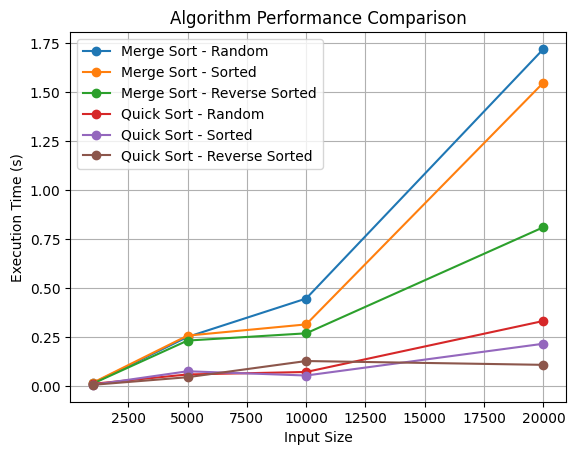

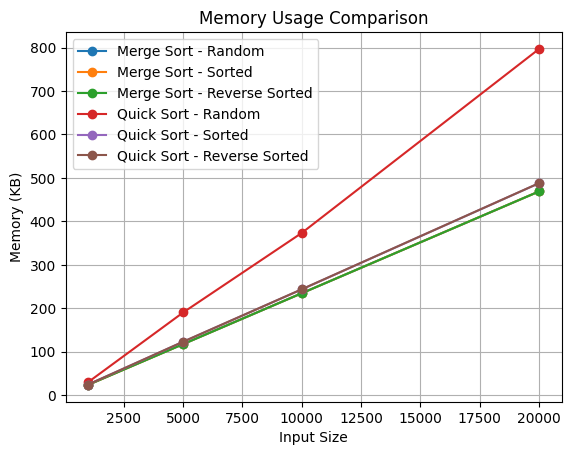

In [1]:
import random
import time
import tracemalloc
import matplotlib.pyplot as plt

# ------------------------------
# Merge Sort Implementation
# ------------------------------
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


# ------------------------------
# Quick Sort Implementation
# ------------------------------
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)


# ------------------------------
# Helper Function to Measure Performance
# ------------------------------
def measure_performance(sort_function, arr):
    tracemalloc.start()
    start_time = time.perf_counter()

    if sort_function == quick_sort:
        sorted_arr = sort_function(arr)
    else:
        sorted_arr = arr.copy()
        sort_function(sorted_arr)

    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return end_time - start_time, peak / 1024  # Convert bytes to KB


# ------------------------------
# Generate Test Datasets
# ------------------------------
def generate_datasets(size):
    random_data = [random.randint(0, 100000) for _ in range(size)]
    sorted_data = sorted(random_data)
    reverse_sorted_data = sorted_data[::-1]
    return random_data, sorted_data, reverse_sorted_data


# ------------------------------
# Run Performance Tests
# ------------------------------
sizes = [1000, 5000, 10000, 20000]
results = {"Merge Sort": [], "Quick Sort": []}

for size in sizes:
    random_data, sorted_data, reverse_sorted_data = generate_datasets(size)

    for dataset_name, dataset in [("Random", random_data),
                                  ("Sorted", sorted_data),
                                  ("Reverse Sorted", reverse_sorted_data)]:
        merge_time, merge_mem = measure_performance(merge_sort, dataset.copy())
        quick_time, quick_mem = measure_performance(quick_sort, dataset.copy())

        results["Merge Sort"].append((size, dataset_name, merge_time, merge_mem))
        results["Quick Sort"].append((size, dataset_name, quick_time, quick_mem))

# ------------------------------
# Display Results
# ------------------------------
print("{:<15} {:<15} {:<15} {:<15} {:<15}".format("Algorithm", "Data Type", "Size", "Time (s)", "Memory (KB)"))
print("-" * 75)
for algo in results:
    for size, dtype, t, mem in results[algo]:
        print("{:<15} {:<15} {:<15} {:<15.6f} {:<15.2f}".format(algo, dtype, size, t, mem))

# ------------------------------
# Visualization
# ------------------------------
def plot_performance(results, metric="time"):
    for algo in results:
        for dtype in ["Random", "Sorted", "Reverse Sorted"]:
            x = [size for size, d, t, m in results[algo] if d == dtype]
            y = [t if metric == "time" else m for size, d, t, m in results[algo] if d == dtype]
            plt.plot(x, y, marker='o', label=f"{algo} - {dtype}")

    plt.xlabel("Input Size")
    plt.ylabel("Execution Time (s)" if metric == "time" else "Memory (KB)")
    plt.title("Algorithm Performance Comparison" if metric == "time" else "Memory Usage Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Time and Memory Graphs
plot_performance(results, metric="time")
plot_performance(results, metric="memory")
